# **import libraries**

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **load data**

In [ ]:
(x_train_o, y_train_o), (x_test_o, y_test_o) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


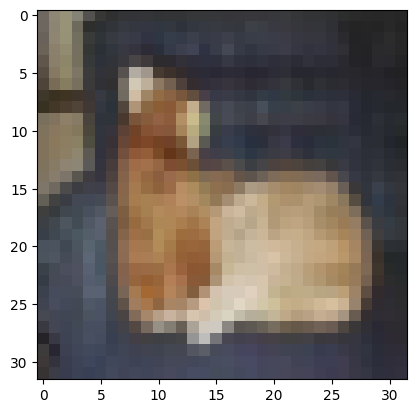

In [ ]:
plt.imshow(x_train[17])

normalization

In [ ]:
x_train =x_train_o.astype('float32')
x_test = x_test_o.astype('float32')
x_train/=255
x_test/=255

In [ ]:
y_train_o[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

# **One_Hot**

In [ ]:
y_train = keras.utils.to_categorical(y_train_o,num_classes=10)
y_test = keras.utils.to_categorical(y_test_o,num_classes=10)

In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

# **build a model**

In [ ]:
model1=Sequential()
model1.add (Conv2D(32,(3,3), activation="relu", input_shape=(32,32,3)))
model1.add(MaxPooling2D (2,2))
model1.add(Conv2D(32,(3,3), activation="relu"))
model1.add(MaxPooling2D (2,2))
model1.add(Conv2D(64,(3,3), activation="relu"))
model1.add(MaxPooling2D (2,2))
model1.add(Flatten())     #GlobalAveragePooling2D())
model1.add(Dropout(0.5))
model1.add(Dense(10 , activation="softmax"))

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,210 (121.91 KB)

 Trainable params: 31,210 (121.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)


In [ ]:
#model1.compile(loss='categorical_crossentropy', optimizer=opt_rms ,metrics=['accuracy'])
model1.compile(loss='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [ ]:
history= model1.fit(x_train,y_train,batch_size=64 ,epochs=25, validation_split=0.2)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2476 - loss: 2.0035 - val_accuracy: 0.4585 - val_loss: 1.5153
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4293 - loss: 1.5565 - val_accuracy: 0.5139 - val_loss: 1.3858
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4897 - loss: 1.4205 - val_accuracy: 0.5255 - val_loss: 1.3461
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5171 - loss: 1.3422 - val_accuracy: 0.5749 - val_loss: 1.2184
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5359 - loss: 1.2933 - val_accuracy: 0.5553 - val_loss: 1.2594
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5479 - loss: 1.2639 - val_accuracy: 0.6028 - val_loss: 1.1480
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5637 - loss: 1.2132 - val_accuracy: 0.6192 - val_loss: 1.1038
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5743 - loss: 1.1895 - val_accuracy: 0.

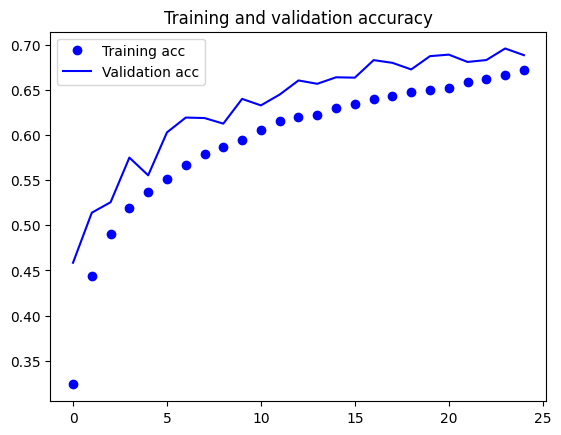

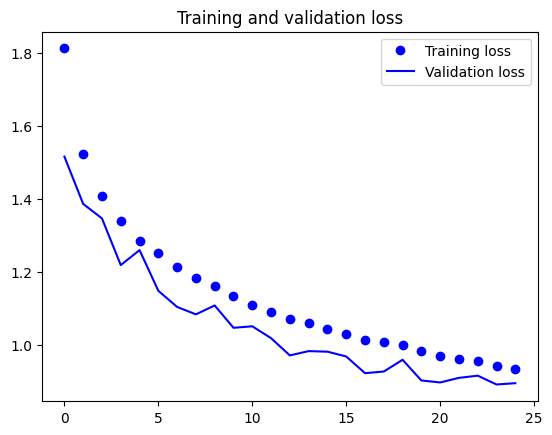

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
predicted = model1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
predicted_class = np.argmax(predicted ,axis =1)


In [ ]:
print("predicted:")
print(predicted_class)
print("True Label:")
print(y_test_o)

predicted:
[8 8 8 ... 5 1 7]
True Label:
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


Text(0, 0.5, 'True label')

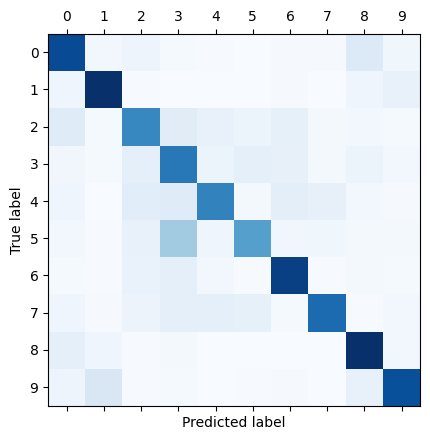

In [ ]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test_o, predicted_class), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label")